
# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


Data Dictionary
+ 01 - PatientId: Identification of a patient
+ 02 - AppointmentID: Identification of each appointment
+ 03 - Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
+ 04 - AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.
+ 05 - ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
+ 06 - Age: How old is the patient.
+ 07 - Neighbourhood: Where the appointment takes place.
+ 08 - Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
+ 09 - Hipertension: True or False
+ 10 - Diabetes: True or False
+ 11 - Alcoholism: True or False
+ 12 - Handcap: True or False
+ 13- SMS_received: 1 or more messages sent to the patient.
+ 14- No-show: True or False.

### Question(s) for Analysis

+ Do patients with specific disease or condition tend to not show up in their appointment?
+ Do patients in range of ages tend to not show up in their appointment?
+ If patient is enrolled in Brasilian welfare program Bolsa Família or not has to do with commitment to show up to appoinmtment?
+ Does gender impact patients show up to appoinmtment?


In [29]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [31]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [32]:
df.shape

(110527, 14)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [34]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [35]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [36]:
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       


### Data Cleaning

<a id="cleaning"></a>
Converting coulmns strings to lower case and change no-show coulmn to no_show to better use it in some data frames functionalities

In [37]:

# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.columns = df.columns.str.lower()
df.rename(columns={'no-show':'no_show'},inplace=True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

<a></a>
Checking the range of samples ranges distribution

Text(0.5,1,'Number of patients by age distribution')

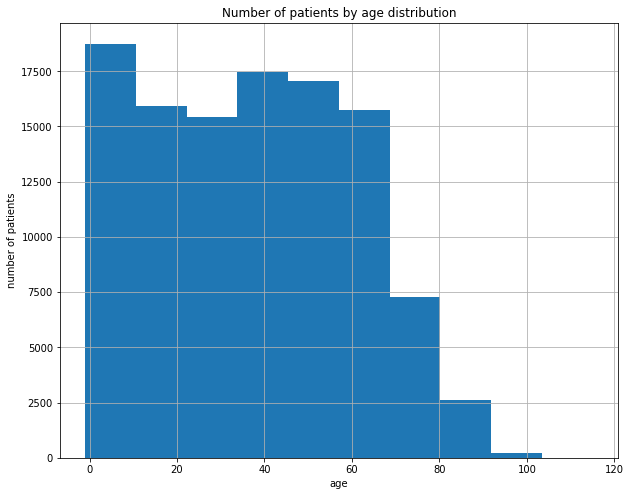

In [38]:
ax= df['age'].hist(figsize=(10,8));
ax.set_xlabel("age")
ax.set_ylabel("number of patients")
ax.set_title("Number of patients by age distribution")

<a></a>
Most of patients age fall between 30 and 50

<a></a>
Adding columns for appointments and schedule days and month of datetime type  

In [39]:
df.appointmentday = pd.to_datetime(df['appointmentday'])
df.scheduledday = pd.to_datetime(df['scheduledday'])
df["appointmentday_month"] = df["appointmentday"].dt.month
df["scheduledday_month"] = df["scheduledday"].dt.month

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Relation of patient condition to no show!)

<a></a>
In this question, we are trying to find if a patient has a specific condition does this will make him/her to not show-up more probable

In [40]:
def bar_plot(locations,heights,labels,title,x_label,y_label):  
    
    """
    Creating a function to bar plot 
    """
    plt.bar(locations, heights,tick_label = labels);
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label);

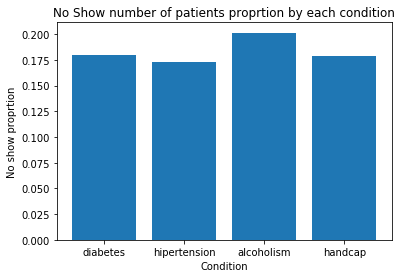

In [41]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_diabetes = df.query('diabetes == True')
df_hipertension = df.query('hipertension == True')
df_alcoholism = df.query('alcoholism == True')
df_handcap = df.query('handcap == True')

#print(df_diabetes.shape[0],df_hipertension.shape[0],df_alcoholism.shape[0],df_handcap.shape[0])

# Number of patients who didn't show from each conditio
df_diabetes_noshow = df_diabetes.query('no_show == "Yes"').shape[0]
df_hipertension_noshow = df_hipertension.query('no_show == "Yes"').shape[0]
df_alcoholism_noshow = df_alcoholism.query('no_show == "Yes"').shape[0]
df_handcap_noshow = df_handcap.query('no_show == "Yes"').shape[0]

#print(df_diabetes_noshow,df_hipertension_noshow,df_alcoholism_noshow,df_handcap_noshow)
df_diabetes_noshow_prop = df_diabetes_noshow/df_diabetes.shape[0]
df_alcoholism_noshow_prop = df_alcoholism_noshow/df_alcoholism.shape[0]
df_hipertension_noshow_prop = df_hipertension_noshow/df_hipertension.shape[0]
df_handcap_noshow_prop = df_handcap_noshow/df_handcap.shape[0]

#df_diabetes_noshow_prop,df_hipertension_noshow_prop,df_alcoholism_noshow_prop,df_handcap_noshow_prop

heights=[df_diabetes_noshow_prop, df_hipertension_noshow_prop,df_alcoholism_noshow_prop,df_handcap_noshow_prop]
locations=[1,2,3,4]
labels=['diabetes','hipertension','alcoholism','handcap']
title='No Show number of patients proprtion by each condition'
x_label='Condition'
y_label='No show proprtion'
bar_plot(locations,heights,labels,title,x_label,y_label)

<a></a>
Patients suffering from alcoholism tend to be most people not showing up to appoinments 

### Research Question 2  (Gender and no show relation)

<a></a>
In this question, we are trying to find relation between gender and no-show relation

In [42]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

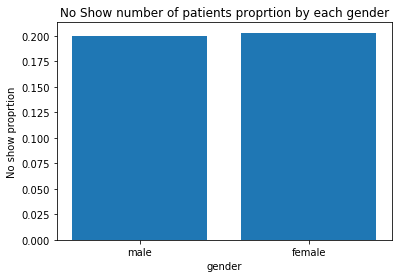

In [43]:
df_male = df.query('gender == "M"')
df_female = df.query('gender == "F"')


df_male_noshow= df_male.query('no_show == "Yes"')
df_female_noshow= df_female.query('no_show == "Yes"')

df_male_noshow_prop =  df_male_noshow.shape[0]/df_male.shape[0]
df_female_noshow_prop =  df_female_noshow.shape[0]/df_female.shape[0]

#print(df_male_noshow_prop,df_female_noshow_prop)
heights=[df_male_noshow_prop, df_female_noshow_prop]
locations=[1,2]
labels=['male','female']
bar_plot(locations,heights,labels,'No Show number of patients proprtion by each gender','gender','No show proprtion')

<a></a>
Seems gender is not a key factor in no show to appoinments 

### Research Question 3  (Age and no show relation)

<a></a>
In this question, we will divide the age into 4 categories from 0-17, 18-36, 37-55 and 55 to 115 and see which category do not show up more to appoinments 

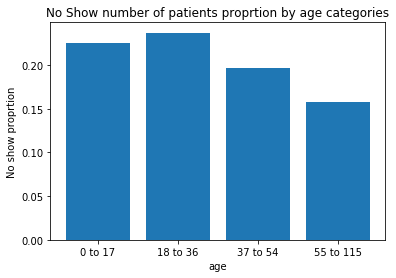

In [44]:
df_age_first_quarter = df.query('0 < age < 18')
df_age_second_quarter = df.query('18 <= age < 37')
df_age_third_quarter = df.query('37 <= age < 55')
df_age_fourth_quarter = df.query('55 <= age <= 115')

df_age_first_quarter_noshow = df_age_first_quarter.query('no_show == "Yes"')
df_age_second_quarter_noshow = df_age_second_quarter.query('no_show == "Yes"')
df_age_third_quarter_noshow = df_age_third_quarter.query('no_show == "Yes"')
df_age_fourth_quarter_noshow = df_age_fourth_quarter.query('no_show == "Yes"')

df_age_first_quarter_noshow_prop = df_age_first_quarter_noshow.shape[0]/df_age_first_quarter.shape[0]
df_age_second_quarter_noshow_prop = df_age_second_quarter_noshow.shape[0]/df_age_second_quarter.shape[0]
df_age_third_quarter_noshow_prop = df_age_third_quarter_noshow.shape[0]/df_age_third_quarter.shape[0]
df_age_fourth_quarter_noshow_prop = df_age_fourth_quarter_noshow.shape[0]/df_age_fourth_quarter.shape[0]

heights=[df_age_first_quarter_noshow_prop, df_age_second_quarter_noshow_prop,df_age_third_quarter_noshow_prop,df_age_fourth_quarter_noshow_prop]
locations=[1,2,3,4]
labels=['0 to 17','18 to 36','37 to 54','55 to 115']
bar_plot(locations,heights,labels,'No Show number of patients proprtion by age categories','age','No show proprtion')

<a></a>
18 to 36 age range is the age range with highest no show between other age ranges

## Checking group age 18 to 36 and most common condition

Digging deep into age group 18 to 36 which was found are the one who mostly do not show up to appoinments and try to find the most spread condition among them to address them more

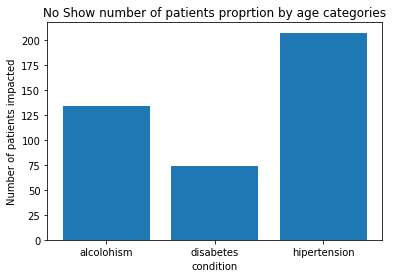

In [45]:
age_alc=df_age_second_quarter_noshow.query('alcoholism == 1').shape[0]
age_diab=df_age_second_quarter_noshow.query('diabetes == 1').shape[0]
age_hiper=df_age_second_quarter_noshow.query('hipertension == 1').shape[0]


heights=[age_alc, age_diab,age_hiper]
locations=[1,2,3]
labels=['alcolohism','disabetes','hipertension']
bar_plot(locations,heights,labels,'No Show number of patients proprtion by age categories','condition','Number of patients impacted')

<a></a>
Age range from 18 to 36 who do not show to appoinments are mostly impacted with hipertension

<a id='conclusions'></a>
## Conclusions

> Among different patient conditions, patients with alcolohism are the patients who do not show up more to appoinments. There is no difference between male and female patients in show up results.Patients from age range 18 to 36 is the one who mostly do not show up to appoinments, age range from 55 to 115 are the ones who show up more.

> A decision suggested to send sms and do more follow up to age group from 18 to 36 suffering from hipertension to encourage them more to show up to their appoinments 

> Limitations section:
Since the number of recorded female appointments are more than male one and we didn't see a big difference in no show pattern relying on gender we need to do the analysis on bigger span of samples to detect any insights based on gender.

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0